## Implementing Gradient Descent 

In [1]:
#import necessary libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#set the random seed
np.random.seed(1)

### Gradient Descent : Univariate Data

In [2]:
#we will consider a univariate dataset of X,y with 1000 points
N = 100
X = np.random.rand(N,1)*5 #define X
y = 4*X - 10 #define Y (note : Y will also be broadcasted into a list)
print(X.shape,y.shape)

#get some approximate noisy data (just for plotting purposes)
y_noise = y + np.random.randn(N,1)

(100, 1) (100, 1)


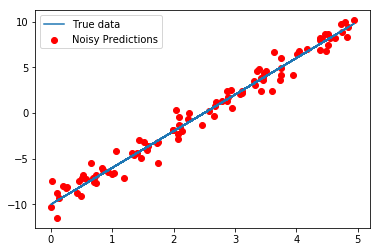

In [3]:
#plot the data
#noisy prediction 
plt.scatter(X,y_noise,color='r',label='Noisy Predictions')

#true data
plt.plot(X,y,label='True data')
plt.legend()
plt.show()

Our goal is to predict the true function using gradient descent

In [4]:
#make a class for linear Regression
class LinearReg:
    
    def __init__(self):
        #define w and b in the init function
        self.w = None
        self.b = None
    
    def predict(self,x):
        #y_pred = w*x+b
        return x*self.w+self.b
    
    def loss(self,x,y):
        return np.sum(np.square(y-self.predict(x)))/2*N
    
    def grad_w(self,x,y):
        #get the predictions
        y_pred = self.predict(x)
        return -np.sum((y-self.predict(x))*x)/N
    
    
    def grad_b(self,x,y):
        #get the predictions
        y_pred = self.predict(x)
        return -np.sum(y-y_pred)/N
    
    #fit function
    def fit(self,x,y,epochs=10,lr=0.1):
        #initialize w and b
        self.w = 0
        self.b = 0 
        
        #a list to store chaging w and b vals
        params = []
        l = []
        for e in range(epochs):
            l.append(self.loss(x,y))
            params.append([self.w,self.b])
            self.w -= lr*self.grad_w(x,y)
            self.b -= lr*self.grad_b(x,y)
            
        return np.array(params),np.array(l)
    
model = LinearReg()

In [5]:
params,loss = model.fit(X,y,epochs=200)

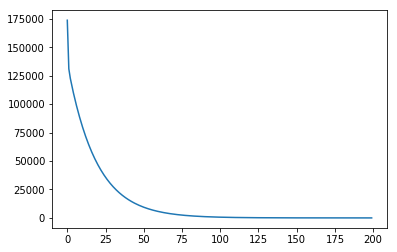

In [6]:
plt.plot(loss)

In [7]:
#converging point
params[-1]

array([ 3.984683  , -9.95079063])

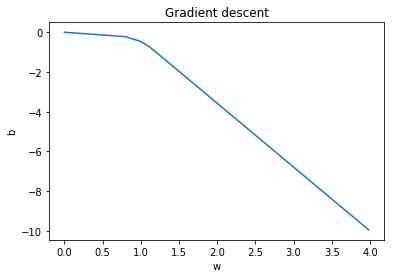

In [8]:
plt.plot(params[:,0],params[:,1])
plt.title('Gradient descent')
plt.xlabel('w')
plt.ylabel('b')
plt.show()

### Multi-variate Data

In [9]:
N = 1000
#dimensions
D = 5
X = 5*np.random.randn(N,D)
#define true weights (including bias)
w_real = np.array([1,2,3,4,5])
w_real  = w_real.reshape(5,1)

y = X.dot(w_real)
y_obs = y + np.random.randn(N,1)
print(w_real.shape,y.shape)

(5, 1) (1000, 1)


In [10]:
#make a class for linear Regression
class LinearRegMulti:
    
    def __init__(self):
        #define w and b in the init function
        self.w = None
    
    def predict(self,x):
        #y_pred = w*x+b (dot product)
        # x- 1000*5 , w- 5*1 , b - 1 ; y - 1000*1
        return x.dot(self.w)
    
    #loss function will remain same
    def loss(self,x,y):
        return np.sum(np.square(y-self.predict(x)))/N
    
    def grad_w(self,x,y):
        #get the predictions
        #y_pred - 1000,1 , x - 1000,5 , 
        y_pred = self.predict(x)
        # return - 5,1
        return -2*x.T.dot(y-y_pred)/N
    
    #fit function
    def fit(self,x,y,epochs=10,lr=0.001):
        #initialize w and b
        self.w = np.random.randn(D,1)
        
        #a list to store chaging w and b vals
        params = np.zeros([epochs,D,1])
        l = np.zeros([epochs])
        for e in range(epochs):
            l[e] = self.loss(x,y)
            params[e] = self.w
            self.w -= lr*self.grad_w(x,y)
        return np.array(params),np.array(l)
    
model1 = LinearRegMulti()

In [11]:
params,loss = model1.fit(X,y,epochs=100)

In [12]:
params[-1]

array([[1.00989292],
       [1.97225374],
       [2.97646198],
       [3.98784514],
       [4.97545697]])

In [13]:
w_real

array([[1],
       [2],
       [3],
       [4],
       [5]])

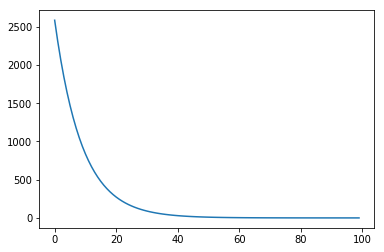

In [14]:
plt.plot(loss)